# **Artist Performance Analysis**

## Cleaning "Popular_Spotify_Songs.csv" file



In [1]:
# Importing dependecy for ingorning warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dependencies/libraries for analysis and manipulation purposes
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import scipy.stats as st


In [3]:
# Defining the file path to find the data from "Popular_Spotify_Songs.csv" file
spotify_file = Path('Resources/Popular_Spotify_Songs.csv')

# Reading "Popular_Spotify_Songs.csv" file to pull in data to create a dataframe
top_streaming_platform_songs= pd.read_csv(spotify_file)

#Displaying all the data
top_streaming_platform_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Dropping the entire row of any "track_name" that has a specical character

is_readable = lambda x: all(ord(c) < 128 for c in str(x))

# Filter the DataFrame to drop rows with unreadable characters
cleaned_top_songs = top_streaming_platform_songs[top_streaming_platform_songs.map(is_readable).all(axis=1)]

# Displaying cleaned Dataframe
cleaned_top_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
# Overriding "cleaned_top_spotify_songs" dataframe with only columns that will be used for analysis and visualization 

cleaned_top_songs = cleaned_top_songs[['artist(s)_name', 'track_name', 'artist_count', 'released_year', 'released_month', 'released_day' , 'in_spotify_playlists', 'in_spotify_charts', 
                                        'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts','danceability_%','acousticness_%']]

#Displaying cleaned dataframe
cleaned_top_songs

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,acousticness_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,80,31
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382,71,7
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949,51,17
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548,55,11
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,My Mind & Me,1,2022,11,3,953,0,91473363,61,13,37,1,0,60,57
949,Taylor Swift,Bigger Than The Whole Sky,1,2022,10,21,1180,0,121871870,4,0,8,0,0,42,83
950,"Feid, Paulo Londra",A Veces (feat. Feid),2,2022,11,3,573,0,73513683,2,0,7,0,0,80,4
951,"Feid, Sech, Jhayco",En La De Ella,3,2022,10,20,1320,0,133895612,29,26,17,0,0,82,8


----------
## Top Months to Release Songs
----------

In [6]:
# Importing dependency for changing numerical month values to month names
import calendar

# Finding the months that have the most released song throughout years 1930 to 2023
month_most_released_songs_series = cleaned_top_songs['released_month'].value_counts()

# Creating list of month values to change to month names
month_num_list=[1,2,3,4,5,6,7,8,9,10,11,12]

# Empty List to append the names of each month instead of a numerical value for each month (Ex: 1=> Janurary)
month_name_list=[]

# Creating a dataframe from series "month_most_released_songs_series"
month_most_released_songs_df = pd.DataFrame(month_most_released_songs_series).sort_values('released_month')

# For loop to find each month in the 'month_num' list above
for month_num in month_num_list:

  # Appending the changed month name into the new list called "month_name"
  month_name_list.append(calendar.month_name[month_num])


# Creating a new dataframe "new_months" with month name and song count
new_months_df = pd.DataFrame({'Months':month_name_list, 'Song Count':month_most_released_songs_df['count']})

# Resetting and dropping index to have a clean dataframe with "Months" as names instead of numbers and "Song Count" of each months for number of songs released in those months
new_months_df = new_months_df.reset_index(drop=True)  # Drop the old index if desired

#Displaying 'new_months' dataframe
new_months_df

,Months,Song Count
0,January,119
1,February,54
2,March,73
3,April,58
4,May,111
5,June,78
6,July,57
7,August,38
8,September,50
9,October,64


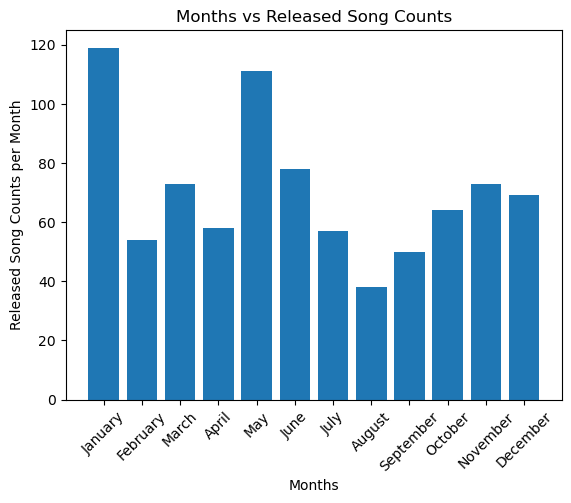

In [7]:
# Creating visualization for "Months" vs "Song Count per Month"

# Defining x & y-axes for bar chart
x_axis = new_months_df['Months']
y_axis = new_months_df['Song Count']

# Creating bar chart for "Months" vs "Song Count per Month"
plt.bar(x_axis,y_axis)

# Making x-axis labels more visually appealing 
plt.xticks(rotation = 45)

#Defining x & y-axes labels for bar chart
plt.title('Months vs Released Song Counts')
plt.xlabel('Months')
plt.ylabel('Released Song Counts per Month')

#Display Bar Graph
plt.show()


## Months vs Released Song Count Analysis 
*  Based on the bar graph above that is referencing the month of a year vs released song count shows that January tends to be the most popular month for artists to release their new song. The second most popular month for artists to release their new songs is the month of May with all the other months being some what equal. The logical reasoning behind this is that artists want to release their new songs when people are in good moods and excited for the new upcoming year. May being the next most popular month for artists to release their new songs also makes sense because its the month that leads into summer and since the weather is getting warmer and people are outside more and hanging out with family and friends, they tend to listen to more music which would result in artists wanting to capitalize off this opportunity.

----------
## Top Days to Release Songs
----------

In [8]:
# Finding the days of the month that have the most released song

# Finding the days that have the most released song throughout years 1930 to 2023
days_most_released_songs_series = cleaned_top_songs['released_day'].value_counts()

# Creating a dataframe from series "days_most_released_songs_series"
days_most_released_songs_df = pd.DataFrame(days_most_released_songs_series).sort_values('released_day')

# Creating a new dataframe "new_days_df" with the day in a month and released song count
new_days_df = pd.DataFrame({'Days':days_most_released_songs_df.index, 'Released Song Count':days_most_released_songs_df['count']})

# Resetting and dropping index to have a clean dataframe with "Days" as names instead of numbers and "Song Count" of each day for number of songs released throughout a month
new_days_df = new_days_df.reset_index(drop=True)

# Displaying 'new_days_df' dataframe
new_days_df.head()

,Days,Released Song Count
0,1,87
1,2,37
2,3,27
3,4,36
4,5,24


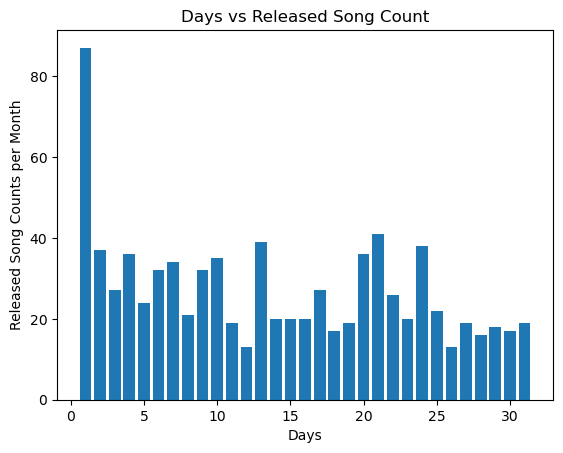

In [9]:
# Creating bar chart visualization for "Day" vs "Released Song Counts per Day"

#Defining x & y-axes for bar chart
x_axis = new_days_df['Days']
y_axis = new_days_df['Released Song Count']

# Creating bar chart for "Months" vs "Song Count per Month"
plt.bar(x_axis,y_axis)

#Defining x & y-axes labels and tilte for bar chart
plt.title('Days vs Released Song Count')
plt.xlabel('Days')
plt.ylabel('Released Song Counts per Month')

#Diplay Bar Graph
plt.show()

## Days vs Released Song Count Analysis 
* Based on the bar graph above that is referencing the days in a month vs released song count. The graph shows that the vast majority of artists tend to release their new songs on the 1st of every month (87 songs). The logical reasoning behind this could be that artists want to build anticipation for their upcoming albums or projects that they will be releasing later in the month. The second most popular day for artist to release their new songs is the 21st of the month, but as you can see from the bar chart, there is not a major difference between releasing a new song on any other day besides the 1st of the month which seems to have the most success for all artists regardless of who they are. 

----------
## Performance of Collaborating vs Solo Artists
----------

In [10]:
# Dataframe of songs that were created just by an individual artist
solo_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] <= 1]
solo_artists_df

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,acousticness_%
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382,71,7
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949,51,17
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548,55,11
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425,65,14
7,Quevedo,Columbia,1,2023,7,7,714,43,58149378,25,89,30,13,194,67,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,Drake,BackOutsideBoyz,1,2022,11,4,1045,0,93367537,8,5,2,0,0,85,4
947,Taylor Swift,The Great War,1,2022,10,21,1274,0,181382590,1,6,11,0,0,57,22
948,Selena Gomez,My Mind & Me,1,2022,11,3,953,0,91473363,61,13,37,1,0,60,57
949,Taylor Swift,Bigger Than The Whole Sky,1,2022,10,21,1180,0,121871870,4,0,8,0,0,42,83


In [11]:
# Dataframe of songs that were created as collobrations from 2 or more artists
collab_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] > 1]
collab_artists_df.head()

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,acousticness_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,80,31
5,"Dave, Central Cee",Sprinter,2,2023,6,1,2186,91,183706234,67,213,88,17,946,92,19
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,2,2023,3,16,3090,50,725980112,34,222,43,13,418,67,48
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,2,2023,3,17,2953,44,553634067,49,110,66,13,339,81,21
10,"Bad Bunny, Grupo Frontera",un x100to,2,2023,4,17,2876,40,505671438,41,205,54,12,251,57,23


In [12]:
#pie chart time
from collections import Counter

collab_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] > 1]

#filter df down to the relevant column
collab_filter_df = collab_artists_df.filter(items=['artist_count'])

#count how many times each vlue shows up in the column
collab_slice = Counter(collab_filter_df['artist_count'])

#make it a list so it can be plotted
collab_values = list(collab_slice.values())

print(collab_values)

[210, 74, 1, 11, 5, 2, 1]


In [13]:
#solo artist time
solo_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] <= 1]

#filter df down to the relevant column
solo_filter_df = solo_artists_df.filter(items=['artist_count'])

#count the rows in the column since the values are the same
solo_slice = Counter(solo_filter_df['artist_count'])

#make it a list so it can be plotted
solo_values = list(solo_slice.values())

print(solo_values)

[540]


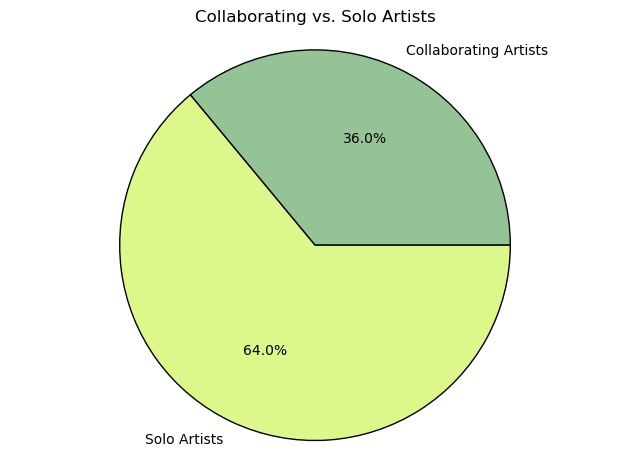

In [14]:
#plotting out the chart

#set up the variables
labels = ['Collaborating Artists', 'Solo Artists']
colors = ['#94C396', '#DCF78A']


#specify the different aspects of the chart you want shown
plt.pie(x=[sum(collab_values), sum(solo_values)], labels=['Collaborating Artists', 'Solo Artists'], colors = colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Collaborating vs. Solo Artists')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Solo vs Collaborating Artists Analysis 
* The majority of the songs appearing on this list of most-streamed Spotify songs are released by solo artists, though collaborating artists do make up a large portion. What is most significant, though, is that the solo artists make up well over half of the names in the dataset, and that is not counting if they appear on another entry when collaborating with another artist. According to this dataset, there is no detriment to launching a career as a solo artist, in fact, appearing as a solo act seems to be the most popular and most successful method for pursuing a career in the music industry.

----------
## Correlation of Shazam Charts vs Total Streams
----------

In [15]:
# Creating a smaller dataframe called "shazam_vs_streams_df" with only the columns need for statstical analysis calculations
shazam_vs_streams_df = cleaned_top_songs[['artist(s)_name', 'track_name','streams','in_shazam_charts']]
shazam_vs_streams_df

,artist(s)_name,track_name,streams,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141381703,826
1,Myke Towers,LALA,133716286,382
2,Olivia Rodrigo,vampire,140003974,949
3,Taylor Swift,Cruel Summer,800840817,548
4,Bad Bunny,WHERE SHE GOES,303236322,425
...,...,...,...,...
948,Selena Gomez,My Mind & Me,91473363,0
949,Taylor Swift,Bigger Than The Whole Sky,121871870,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),73513683,0
951,"Feid, Sech, Jhayco",En La De Ella,133895612,0


In [16]:
# Dropping nulls values and unnesscary values from both "streams" & "in_shazam_charts" columns

# Changing value format in column "in_shazam_charts" to not include a common "," for thousands (Ex: 1,000 => 1000)
shazam_vs_streams_df.loc[:,'in_shazam_charts'] = shazam_vs_streams_df.loc[:,'in_shazam_charts'].str.replace(',', '')

# Filling all blank values in dataframe with "NAN"
shazam_vs_streams_df = shazam_vs_streams_df.fillna("NAN")

# Droping entire row that has value "BPM110Key......" in column "streams" since its not a numerical total stream value
shazam_vs_streams_df = shazam_vs_streams_df.query('streams != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"')

# Dropping all rows with null/"NAN" values from column "in_shazam_charts"
shazam_vs_streams_df = shazam_vs_streams_df.query('in_shazam_charts != "NAN"')

# Dropping any other null values that might be left in the dataframe "shazam_vs_streams_df" to allow for statistical analysis
shazam_vs_streams_df.dropna()

,artist(s)_name,track_name,streams,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141381703,826
1,Myke Towers,LALA,133716286,382
2,Olivia Rodrigo,vampire,140003974,949
3,Taylor Swift,Cruel Summer,800840817,548
4,Bad Bunny,WHERE SHE GOES,303236322,425
...,...,...,...,...
948,Selena Gomez,My Mind & Me,91473363,0
949,Taylor Swift,Bigger Than The Whole Sky,121871870,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),73513683,0
951,"Feid, Sech, Jhayco",En La De Ella,133895612,0


The correlation between the number of times a song appears in Shazam Charts vs a songs Total Streams is 0.00037


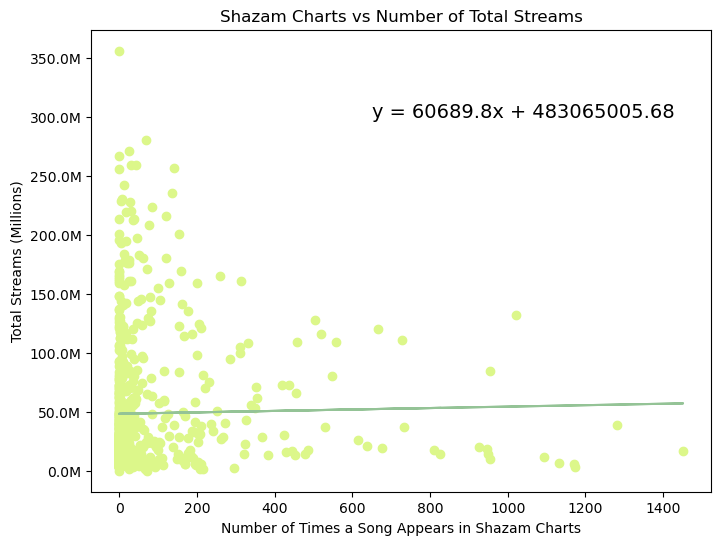

In [17]:
# Creating a scatter plot to show the Correlation between Number of Times a Song is on Shazam Charts vs Total Streams of that song

# Importing dependencies for linear regression calculations
from scipy.stats import linregress

# Converting values in "streams" & "in_shazam_charts" columns into "NUMERIC values" instead of "objects"
shazam_vs_streams_df['streams'] = pd.to_numeric(shazam_vs_streams_df['streams'])
shazam_vs_streams_df['in_shazam_charts'] = pd.to_numeric(shazam_vs_streams_df['in_shazam_charts'])
                                             
# Defining x & y values for scatter plot and linear regression line
x_values = shazam_vs_streams_df['in_shazam_charts']
y_values = shazam_vs_streams_df['streams']

# Defining linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
# Creating Regression Line
regress_values = x_values * slope + intercept 

# Reassigning rvalue to varable called "correlation for easier comprehension => Rounding it to the nearest hundredths decimal place
correlation = round((rvalue**2),5)

# Creating scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c='#DCF78A')

# Creating a string value of Linear Regression Line to plot on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting regression line on Scatter Plot
plt.plot(x_values,regress_values, color='#94C396') 

# Plotting the Equation Line on Scatter Plot for easier analysis
plt.annotate(line_eq,(650,3000000000),fontsize=14,color='black')

#Labeling x & y axis
plt.title('Shazam Charts vs Number of Total Streams')
plt.xlabel('Number of Times a Song Appears in Shazam Charts')
plt.ylabel('Total Streams (Millions)')

# Changing y-axis labels to hundred millions format
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x/1e7)))

# Printing out a sentence above displayed graph for easier comprehension
print(f"The correlation between the number of times a song appears in Shazam Charts vs a songs Total Streams is {correlation}")


# Displays scatter plot
plt.show()

## Shazam Charts vs Total Streams Analysis 
* The linear regression line plotted above on the scatter plot showing the linear relationship between the number of times a song appears in shazam charts vs a songs total streams has a very weak positive correlation of 0.000372903831085. This implies that there is no assocation between a songs performance based on how many times that song makes a shazam chart vs that songs total number of streams on Spotify. The reason behind this could be that although people tend to correlate that the more times someone shazams a specific song to find out the name and artist of that song to save it to a playlist or just remeber it to play at a later time in the future. Everyone has different tastes in music and just because a song may have been "shazamed" more times then other songs, there is no reason to believe that that song is more popular than others based on the linear relationship.

----------
## Correlation of Spotify Charts vs Total Streams
----------

In [18]:
# Creating a smaller dataframe called "spotify_charts_vs_streams_df" with only the columns need for statstical analysis calculations
spotify_charts_vs_streams_df = cleaned_top_songs[['artist(s)_name', 'track_name','streams','in_spotify_charts']]
spotify_charts_vs_streams_df.head()

,artist(s)_name,track_name,streams,in_spotify_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141381703,147
1,Myke Towers,LALA,133716286,48
2,Olivia Rodrigo,vampire,140003974,113
3,Taylor Swift,Cruel Summer,800840817,100
4,Bad Bunny,WHERE SHE GOES,303236322,50


In [19]:
# Dropping nulls values and unnesscary values from both "streams" & "in_shazam_charts" columns

# Changing value format in column "spotify_charts_vs_streams_df" to not include a common "," for thousands (Ex: 1,000 => 1000)
spotify_charts_vs_streams_df.loc[:,'in_spotify_charts'] = spotify_charts_vs_streams_df.loc[:,'in_spotify_charts'].replace(',', '')

# Filling all blank values in dataframe with "NAN"
spotify_charts_vs_streams_df = spotify_charts_vs_streams_df.fillna("NAN")

# Droping entire row that has value "BPM110Key......" in column "streams" since its not a numerical total stream value
spotify_charts_vs_streams_df = spotify_charts_vs_streams_df.query('streams != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"')

# Dropping all rows with null/"NAN" values from column "spotify_charts_vs_streams_df"
spotify_charts_vs_streams_df = spotify_charts_vs_streams_df.query('in_spotify_charts != "NAN"')

# Dropping any other null values that might be left in the dataframe "spotify_charts_vs_streams_df" to allow for statistical analysis
spotify_charts_vs_streams_df.dropna()

,artist(s)_name,track_name,streams,in_spotify_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141381703,147
1,Myke Towers,LALA,133716286,48
2,Olivia Rodrigo,vampire,140003974,113
3,Taylor Swift,Cruel Summer,800840817,100
4,Bad Bunny,WHERE SHE GOES,303236322,50
...,...,...,...,...
948,Selena Gomez,My Mind & Me,91473363,0
949,Taylor Swift,Bigger Than The Whole Sky,121871870,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),73513683,0
951,"Feid, Sech, Jhayco",En La De Ella,133895612,0


The correlation between the number of times a song appears in Spotify Charts vs a songs Total Streams is 0.059


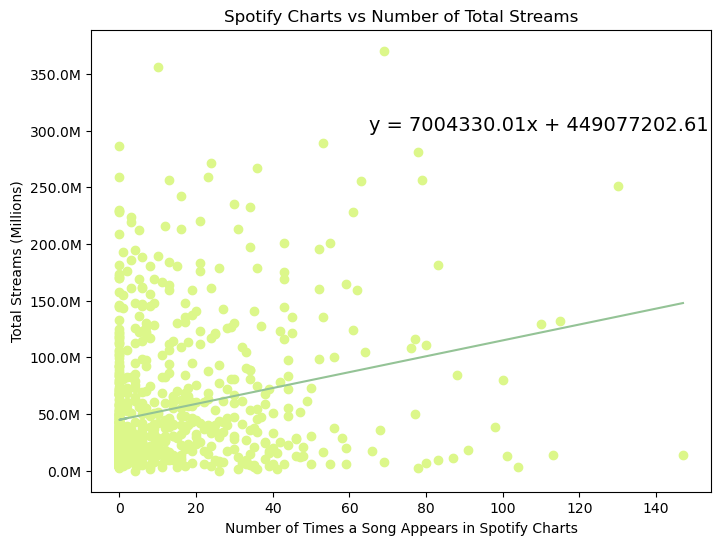

In [20]:
# Creating a scatter plot to show the Correlation between Number of Times a Song is on Spotify Charts vs Total Streams of that song

# Importing dependcies for linear regression calculations
from scipy.stats import linregress

# Converting values in "streams" & "in_shazam_charts" columns into "NUMERIC values" instead of "objects"
spotify_charts_vs_streams_df['streams'] = pd.to_numeric(spotify_charts_vs_streams_df['streams'])
spotify_charts_vs_streams_df['in_spotify_charts'] = pd.to_numeric(spotify_charts_vs_streams_df['in_spotify_charts'])
                                             
# Defining x & y values for scatter plot and linear regression line
x_values = spotify_charts_vs_streams_df['in_spotify_charts']
y_values = spotify_charts_vs_streams_df['streams']

# Defining linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
# Creating Regression Line
regress_values = x_values * slope + intercept 

# Reassigning rvalue to varable called "correlation for easier comprehension => Rounding
correlation = round((rvalue**2),3)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c='#DCF78A')

# Creating a string value of Linear Regression Line to plot on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting regression line on Scatter Plot
plt.plot(x_values,regress_values, color='#94C396') 

# Plotting the Equation Line on Scatter Plot for easier analysis
plt.annotate(line_eq,(65,3000000000),fontsize=14,color='black')

#Labeling x & y axis
plt.title('Spotify Charts vs Number of Total Streams')
plt.xlabel('Number of Times a Song Appears in Spotify Charts')
plt.ylabel('Total Streams (Millions)')

# Changing y-axis labels to hundred millions format
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x/1e7)))

# Printing out a sentence above displayed graph for easier comprehension
print(f"The correlation between the number of times a song appears in Spotify Charts vs a songs Total Streams is {correlation}")

plt.show()

## Spotify Charts vs Total Streams Analysis 
* Our comprehensive study of Spotify's data underscores a clear trend: making it onto the Spotify charts doesnt have any correlation with gaining more streams, it is mainly just a badge of honor. We've found a positive relationship between the number of times a song appears on the charts and its total stream numbers. This isn't just about being heard; it's about amplifying your reach and solidifying your place in the musical zeitgeist.

----------
## Correlation of Danceability Score vs Total Streams
----------

In [21]:
dance_df = cleaned_top_songs[['streams','danceability_%']]
dance_df

,streams,danceability_%
0,141381703,80
1,133716286,71
2,140003974,51
3,800840817,55
4,303236322,65
...,...,...
948,91473363,60
949,121871870,42
950,73513683,80
951,133895612,82


The correlation between danceability and number of streams is: -0.11


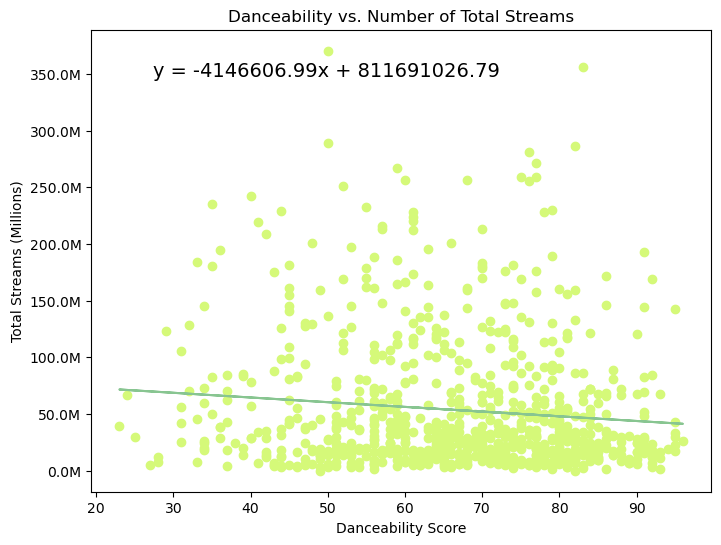

In [22]:
from scipy.stats import linregress, pearsonr
import matplotlib.pyplot as plt

# Convert columns to numeric data type if necessary
dance_df['danceability_%'] = pd.to_numeric(dance_df['danceability_%'], errors='coerce')
dance_df['streams'] = pd.to_numeric(dance_df['streams'], errors='coerce')

# Drop rows with NaN values in either 'danceability_%' or 'streams' column
dance_df = dance_df.dropna(subset=['danceability_%', 'streams']).copy()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(dance_df['danceability_%'], dance_df['streams'])
print(f"The correlation between danceability and number of streams is: {round(correlation_coefficient, 2)}")

# Perform linear regression
slope, intercept, _, _, _ = linregress(dance_df['danceability_%'], dance_df['streams'])

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dance_df['danceability_%'], dance_df['streams'], c="#d5f979")

# Plot the regression line
plt.plot(dance_df['danceability_%'], slope * dance_df['danceability_%'] + intercept, color='#88c591')

# Add linear regression equation annotation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=14, color='black')

# Set the title and labels
plt.title('Danceability vs. Number of Total Streams')
plt.xlabel('Danceability Score')
plt.ylabel('Total Streams (Millions)')

# Changing y-axis labels to hundred millions format
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x/1e7)))

# Show the plot
plt.show()

## Danceability vs Total Streams Analysis
* There appears to be no significant correlation between danceability and number of streams. While there is a slight negative correlation, suggesting that as one factor increases, the other decreases, this association lacks any significance. We investigated this relationship to discern if producing a lively, upbeat, and dance-friendly track had any bearing on its popularity on Spotify. Our analysis, however, reveals that danceability alone does not influence stream count or ensure a song's success. Similarly, the BPM (beats per minute) of a song does not exhibit a substantial impact either. These findings prove to our user that they have full creative freedom, and can craft a song to their preferred rhythm and pace.



----------
## Correlation of Acousticness Score vs Total Streams
----------

In [23]:
# Dropping unnecessary value "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3" from "cleaned_top_songs" dataframe for statisical analysis
cleaned_top_songs = cleaned_top_songs.query('streams != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"')

# Creating smaller dataframe called "auc_df"
auc_df = pd.DataFrame({'Number of Stream':cleaned_top_songs['streams'], 'Auc%':cleaned_top_songs['acousticness_%']})

# Changing "Number of Stream" column to numerial values
auc_df['Number of Stream'] = pd.to_numeric(auc_df['Number of Stream'])

# Chaning number format for "# of Streams" dataframe
auc_df['# of Streams'] = auc_df['Number of Stream']

# Displaying dataframe
auc_df

,Number of Stream,Auc%,# of Streams
0,141381703,31,141381703
1,133716286,7,133716286
2,140003974,17,140003974
3,800840817,11,800840817
4,303236322,14,303236322
...,...,...,...
948,91473363,57,91473363
949,121871870,83,121871870
950,73513683,4,73513683
951,133895612,8,133895612


The correlation between the number of streams vs Acousticness is 0.01


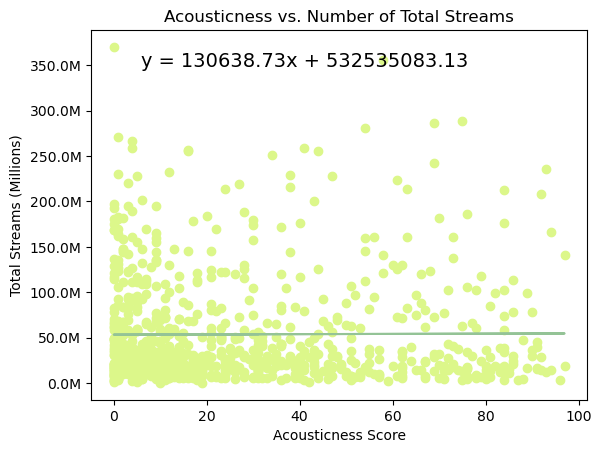

In [24]:
# define x, y values
x_values = auc_df['Auc%']
y_values = auc_df['# of Streams']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot scatter
plt.scatter(x_values,y_values, c='#DCF78A')
plt.plot(x_values,regress_values, color='#94C396')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=14,color="black")
plt.title('Acousticness vs. Number of Total Streams')
plt.xlabel("Acousticness Score")
plt.ylabel("Total Streams (Millions)")

# define correlation
correlation = round(st.pearsonr(x_values,y_values)[0],2)

# Changing y-axis labels to hundred millions format
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x/1e7)))

print(f"The correlation between the number of streams vs Acousticness is {correlation}")
plt.show()

## Acousticness vs Total Streams Analysis
There is no strong correlation between the Acousticness and the number of streams (index of correlation : 0.01). Though our project team expected that Acousticness would be strong factor for popular songs, it doesn't have any specific effect on it.

